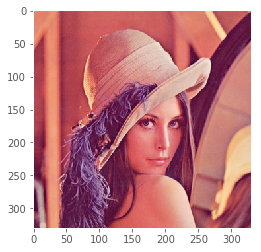

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
curr_dir = os.getcwd()
# %matplotlib inline
lenna = cv.imread(curr_dir + "\\Lenna.png", cv.IMREAD_COLOR)
plt.style.use("ggplot")
plt.rc("axes", **{"grid": False})
plt.imshow(cv.cvtColor(lenna, cv.COLOR_BGR2RGB))


In [5]:
print(lenna.shape)
print(lenna)

(330, 330, 3)
[[[124 137 226]
  [131 137 224]
  [125 137 224]
  ...
  [124 149 233]
  [120 145 229]
  [ 96 109 207]]

 [[124 137 226]
  [131 137 224]
  [125 137 224]
  ...
  [124 148 232]
  [119 144 229]
  [ 96 108 206]]

 [[125 137 226]
  [132 137 223]
  [126 137 224]
  ...
  [126 151 235]
  [122 150 233]
  [ 98 113 212]]

 ...

 [[ 64  27  89]
  [ 60  25  88]
  [ 63  27  91]
  ...
  [ 79  64 161]
  [ 77  67 168]
  [ 77  61 164]]

 [[ 59  18  82]
  [ 58  25  90]
  [ 62  28  95]
  ...
  [ 83  69 172]
  [ 80  71 175]
  [ 79  67 177]]

 [[ 57  22  81]
  [ 60  29  91]
  [ 64  30  96]
  ...
  [ 82  70 177]
  [ 78  69 180]
  [ 82  74 184]]]


In [6]:
img_data = lenna / 255.0
img_data = img_data.reshape((-1, 3))
print(img_data.shape)
print(img_data)

(108900, 3)
[[0.48627451 0.5372549  0.88627451]
 [0.51372549 0.5372549  0.87843137]
 [0.49019608 0.5372549  0.87843137]
 ...
 [0.32156863 0.2745098  0.69411765]
 [0.30588235 0.27058824 0.70588235]
 [0.32156863 0.29019608 0.72156863]]


In [7]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    pixel = data[i].T
    R, G, B = pixel[0], pixel[1],pixel[2]
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0,1), ylim=(0,1))
    fig.suptitle(title, size=20)
#     fig.show()

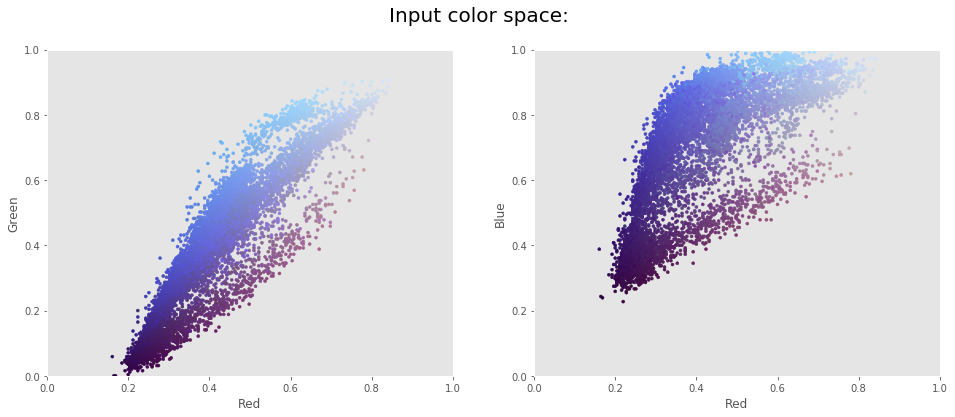

In [8]:
plot_pixels(img_data, title='Input color space:')

In [9]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv.KMEANS_RANDOM_CENTERS
img_data = img_data.astype(np.float32)
compactness, labels, centers = cv.kmeans(img_data, 16, None, criteria, 10, flags)

In [10]:
centers

array([[0.46525118, 0.48021284, 0.79520327],
       [0.78431374, 0.6043573 , 0.64226586],
       [0.7320262 , 0.55686283, 0.60653603],
       [0.29981777, 0.15199079, 0.44611982],
       [0.68324435, 0.43155086, 0.5737968 ],
       [0.6604206 , 0.5847781 , 0.6916589 ],
       [0.37649655, 0.389958  , 0.8337434 ],
       [0.34411433, 0.28409812, 0.66664976],
       [0.6956968 , 0.53037924, 0.69793785],
       [0.6588238 , 0.444233  , 0.63431406],
       [0.6769634 , 0.7778347 , 0.920174  ],
       [0.24326643, 0.07563941, 0.34987193],
       [0.5689591 , 0.6293751 , 0.8632619 ],
       [0.6311512 , 0.5021977 , 0.6533193 ],
       [0.44930214, 0.5444155 , 0.9018036 ],
       [0.6074674 , 0.41925237, 0.5785068 ]], dtype=float32)

In [11]:
new_colors = centers[labels].reshape((-1,3))

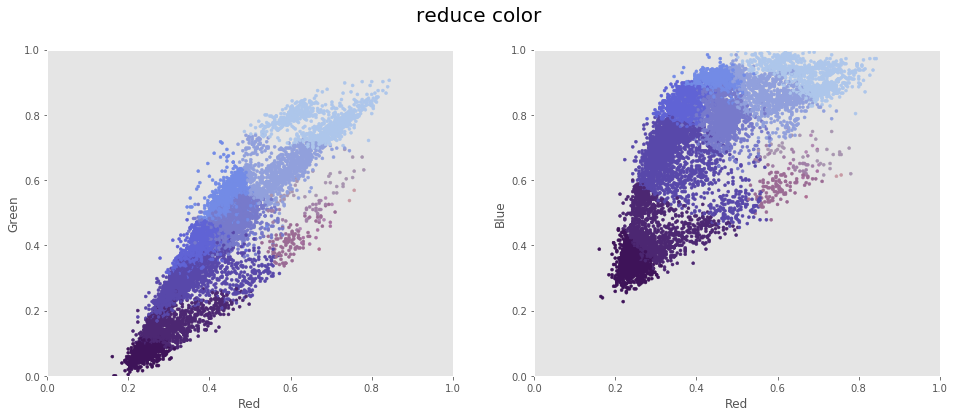

In [12]:
plot_pixels(img_data, colors=new_colors, title="reduce color")

In [13]:
lenna_recolored = new_colors.reshape(lenna.shape)

Text(0.5,1,'16-color')

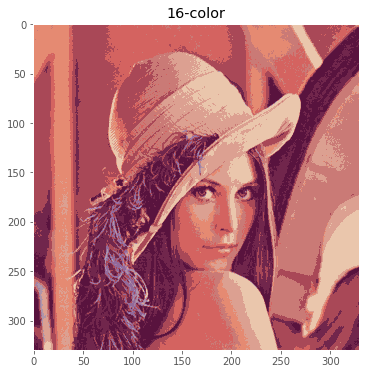

In [14]:
plt.figure(figsize=(10,6))
plt.imshow(cv.cvtColor(lenna_recolored, cv.COLOR_BGR2RGB))
plt.title("16-color")

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

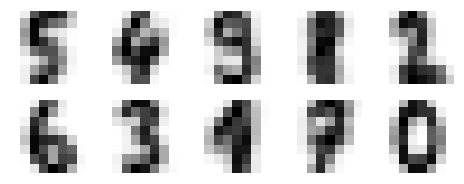

In [16]:
digits.data = digits.data.astype(np.float32)
compactness, clusters, centers = cv.kmeans(digits.data, 10, None, criteria, 10, flags)
fig, ax = plt.subplots(2,5,figsize=(8,3))
centers = centers.reshape(10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.savefig('digits.png')

In [18]:
import numpy as np
from scipy.stats import mode
labels = np.zeros_like(clusters.ravel())
for i in range(10):
    mask = (clusters.ravel() == i)
    labels[mask] = mode(digits.target[mask])[0]

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7417918753478019